In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud
russian_stopwords = stopwords.words("russian")
import re

<h1><center>Постановка задачи</center></h1>
<h3><center>В задании предлагается проанализировать текстовую информацию должностных инструкций и проклассифицировать документы по направлениям деятельности сотрудников компании </center></h3>


<center> 
Должностная инструкция это документ, который дает описание каждой позиции и формулизует обязанности и задачи. Некоторая ее часть стандартная, а некоторую заполняет сам сотрудник. Предполагается, что в зависимости от того, какие обязанности имеет кокретный сотрудник, возможно классифицировать его профиль.


*Посмотрим, как выглядит типичная должностная инструкция в разделе, который заполняет сам сотрудник*

<img src="./pics/lia1.png" alt="Alt text that describes the graphic" title="Title text" />

<img src="./pics/liabilities.png" alt="Alt text that describes the graphic" title="Title text" />

<h1><center>Данные и метки</center></h1>

Имеется 8 направлений: **Персонал, Бурение, Адм, Капстрой, ГиР, БНИ, ГРР, Безопасность**

**Персонал**: HR служба, кадровики и другие сотрудники, которые отвествены за поиск, найм, сопровождение и обучение работников

**Бурение**: геологи, ответственные за буровые работы, в частности полевые работы

**Адм**: административный персонал, финансисты, бухгалтеры, протокольная служба

**Капстрой**: инженеры, отвечающие за строительство и проектирование

**ГиР**: геологи-разработчики

**БНИ**: научный инжиниринг, научный подход и применение IT решений к проблемам геологии

**ГРР**: геологи-разведчики

**Безопасность**: коммерческая тайна, информационная безопасность

In [2]:
data = pd.read_csv('train.csv')
print('Количество документов: ', data.shape[0])
data.head()

Количество документов:  535


text directions
0  01.01.03.05 исследования кернового материала с...        грр
1  00. управление бизнес-процессами и стандартиза...        гир
2  01.01 геологоразведочные работы и развитие рес...        гир
3  01 разведка, добыча нефти и газа. реализация г...        гир
4  01. разведка, добыча нефти и газа. реализация ...    бурение

<h2><center>Насколько классы сбалансированы?</center></h2>


Text(0.5, 1.0, 'Количество документов по направлениям')

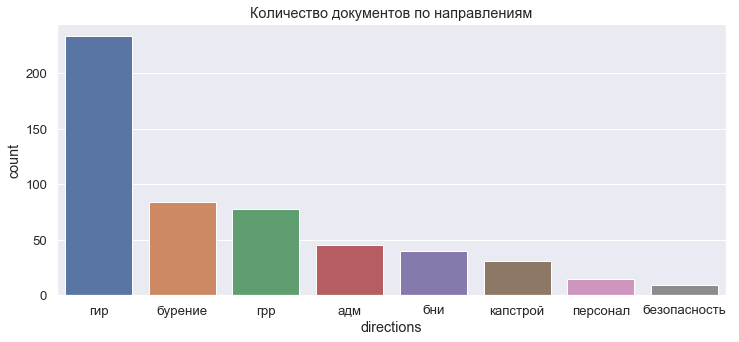

In [3]:
plt.figure(figsize=(12,5))
sns.set(font_scale = 1.2)
sns.countplot(data.directions, order =data.directions.value_counts().index).set_title('Количество документов по направлениям')

<h2><center>Сколько сотрудники пишут по разным направлениям?</center></h2>

In [4]:
temp = pd.DataFrame(list(zip(data.text.apply(len).values, data.directions.values)), columns = ['len', 'dirs'])
temp.groupby('dirs').mean()             

len
dirs                     
адм           6928.044444
безопасность  8832.555556
бни           5443.375000
бурение       6248.976190
гир           5861.424893
грр           6174.423077
капстрой      5519.225806
персонал      5148.800000

Text(0.5, 1.0, 'Средняя длина должностных обязанностей')

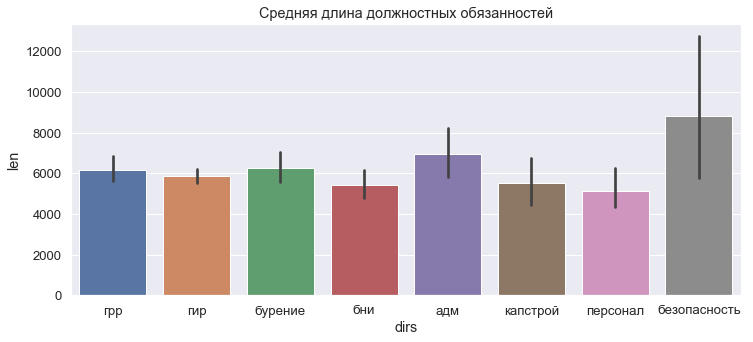

In [5]:
plt.figure(figsize = (12,5))
sns.barplot(data = temp, x = 'dirs', y = 'len').set_title('Средняя длина должностных обязанностей')

<h2><center>
Preprocessing

In [6]:
data.head()

text directions
0  01.01.03.05 исследования кернового материала с...        грр
1  00. управление бизнес-процессами и стандартиза...        гир
2  01.01 геологоразведочные работы и развитие рес...        гир
3  01 разведка, добыча нефти и газа. реализация г...        гир
4  01. разведка, добыча нефти и газа. реализация ...    бурение

In [7]:
def process_russian(text):
    """Убираем стоп-слова, пунктуацию, приводим к нижнему регистру"""
    text = re.sub(r'[^\w\s]',' ',text)
    tokens = [token for token in text.lower().split() if token not in russian_stopwords]
    result = " ".join(tokens)
    
    return result

### Просмотрим результат несложной предобработки

In [8]:
data['processed'] = data.text.apply(process_russian)
data.processed.values[0]

'01 01 03 05 исследования кернового материала сбор систематизация данных исследований горных пород оценка качества результатов лабораторных исследований горных пород анализ результатов лабораторных исследований керна литолого петрофизическая характеристика подсчетных объектов подготовка технического задания методических рекомендаций отбор исследования керна оценка качества отобранного керна поручению руководителя обеспечивает подготовку консолидированной отчетности аналитико статистических материалов выполняемым работам рабочее взаимодействие рамками собственного подразделений подготовка программ лабораторных исследований керна контроль выполнения подрядчиком 03 02 02 01 05 01 организация проведение конкурентных процедур выбора контрагентов блоке разведки добычи обеспечивает подготовку документации квалификации контрагентов числе разработка согласование квалификационных критериев подготовке профильные исследованиям керна исследованию коллекторских свойств пород петрофизическим исследов

In [9]:
data.head()

text directions  \
0  01.01.03.05 исследования кернового материала с...        грр   
1  00. управление бизнес-процессами и стандартиза...        гир   
2  01.01 геологоразведочные работы и развитие рес...        гир   
3  01 разведка, добыча нефти и газа. реализация г...        гир   
4  01. разведка, добыча нефти и газа. реализация ...    бурение   

                                           processed  
0  01 01 03 05 исследования кернового материала с...  
1  00 управление бизнес процессами стандартизацие...  
2  01 01 геологоразведочные работы развитие ресур...  
3  01 разведка добыча нефти газа реализация газа ...  
4  01 разведка добыча нефти газа реализация газа ...

## Что можно сделать еще? 
- привести слова к нормальной форме (лемматизация)
- удалить числа

<h2><center>Далее посмотрим визуально, как выглядят часто встречающиеся слова и выражения в выбранных направлениях</center></h2>


In [10]:
def show_cloud(direction):
    words = data.loc[data.directions == direction]['processed']
    wordcloud = WordCloud(
        background_color='white',
        stopwords=russian_stopwords,
        width=4000,
        height=2000,
        random_state=1).generate(str(words.values))
    
    fig = plt.figure(
        figsize = (25, 18),
        facecolor = 'k',
        edgecolor = 'k')
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()


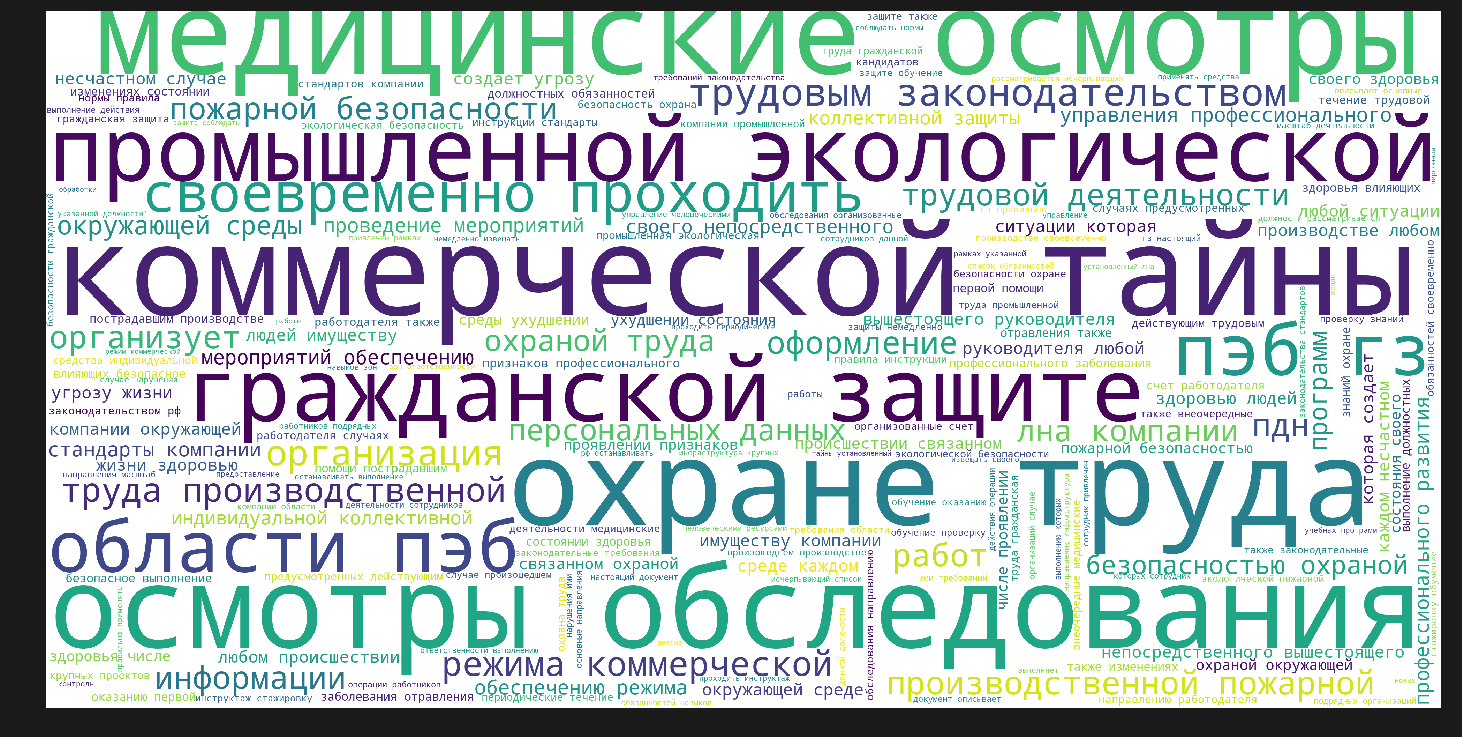

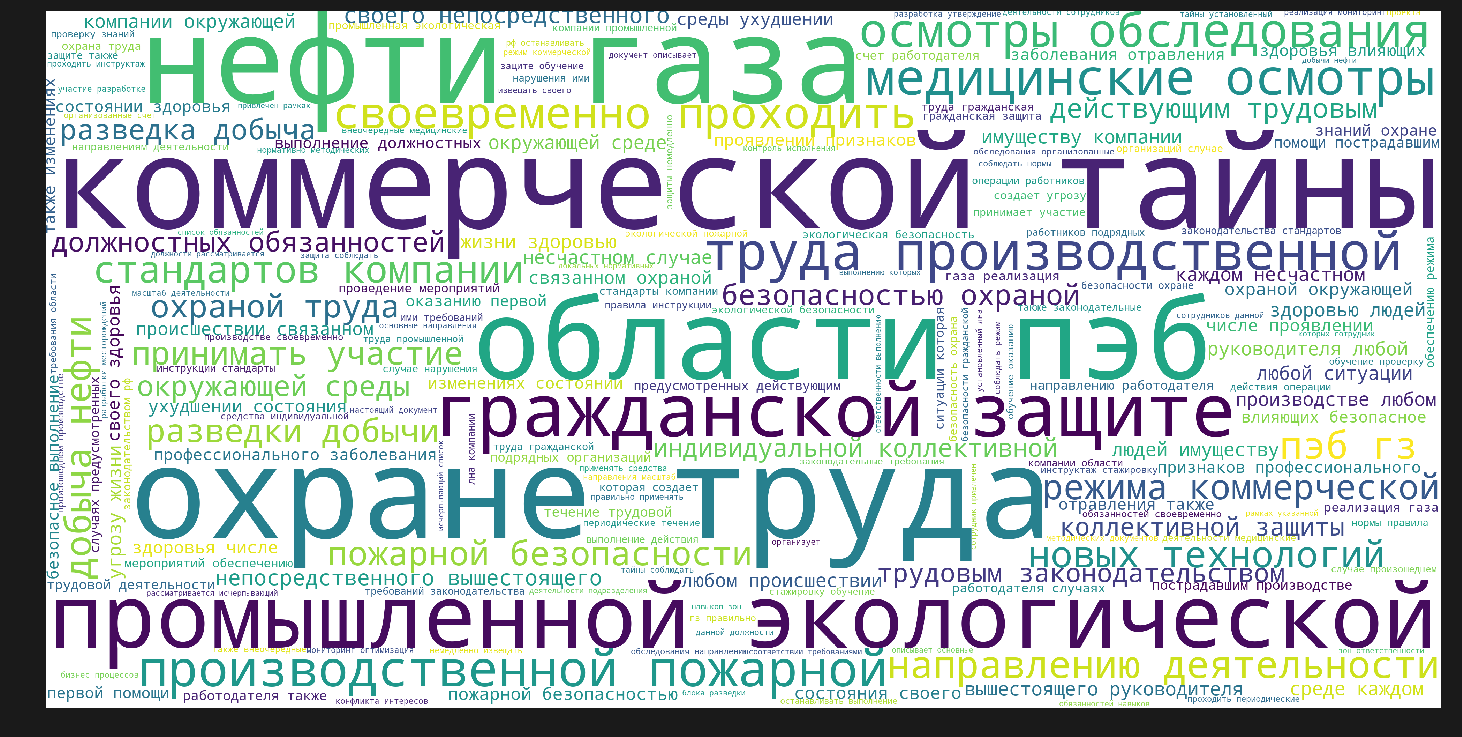

In [350]:
show_cloud('персонал')
show_cloud('бурение')

*Возможно заметить, что и в Персонале и в Бурении много и часто слова связанные с безопастностью, охраной труда и коммерческой тайной. Эти блоки обязательны для заполнения всех сотрудников.* 

*Помешает ли нам это произвести правильную классификацию?*

## Baseline

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

## Зададим с помощью векторизатора разряженную матрицу из слов и выражений

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

<img src="./pics/geolog.png" alt="Alt text that describes the graphic" title="Title text" />

<h2><center>
Разделяем выборку на тренировочную и валидационную и обучаем логистическую регрессию

In [137]:
count_vec = CountVectorizer()
X = count_vec.fit_transform(data['processed'])
y = data.directions
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [138]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print('Первые 10 предсказанных меток: ', predictions[:10])

Первые 10 предсказанных меток:  ['гир' 'грр' 'гир' 'гир' 'гир' 'гир' 'гир' 'адм' 'персонал' 'бни']


### Оценим результаты 

In [139]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         адм       0.68      0.81      0.74        16
безопасность       1.00      0.33      0.50         6
         бни       0.67      0.73      0.70        11
     бурение       0.68      0.81      0.74        21
         гир       0.87      0.87      0.87        70
         грр       0.79      0.66      0.72        29
    капстрой       0.80      0.67      0.73         6
    персонал       0.50      1.00      0.67         2

   micro avg       0.78      0.78      0.78       161
   macro avg       0.75      0.73      0.71       161
weighted avg       0.80      0.78      0.78       161



In [145]:
print('Accuracy score на валидационной выборке =', round(metrics.accuracy_score(y_test,predictions),5))

Accuracy score на валидационной выборке = 0.78261


## Предскажем на тестовой выборке значения и отпарвим на проверку

In [146]:
test_data = pd.read_csv('test.csv', header = None)
test_data.columns = ['text']
print('Количество документов: ', test_data.shape[0])
test_data.head()

Количество документов:  230


text
0  01.05.04 реализация, мониторинг и оптимизация ...
1  01 разведка, добыча нефти и газа. реализация г...
2  19. инновационная деятельность 19.01. управлен...
3  01 разведка, добыча нефти и газа. реализация г...
4  01. разведка, добыча нефти и газа. реализация ...

In [147]:
# также предобработаем
test_data['processed'] = test_data.text.apply(process_russian)
test_data.head()

text  \
0  01.05.04 реализация, мониторинг и оптимизация ...   
1  01 разведка, добыча нефти и газа. реализация г...   
2  19. инновационная деятельность 19.01. управлен...   
3  01 разведка, добыча нефти и газа. реализация г...   
4  01. разведка, добыча нефти и газа. реализация ...   

                                           processed  
0  01 05 04 реализация мониторинг оптимизация раз...  
1  01 разведка добыча нефти газа реализация газа ...  
2  19 инновационная деятельность 19 01 управление...  
3  01 разведка добыча нефти газа реализация газа ...  
4  01 разведка добыча нефти газа реализация газа ...

In [148]:
X = count_vec.transform(test_data.text)
predictions = clf.predict(X)
print('Первые 10 предсказанных меток: ', predictions[:10])

Первые 10 предсказанных меток:  ['гир' 'грр' 'бурение' 'гир' 'грр' 'адм' 'бурение' 'капстрой' 'бурение'
 'персонал']


### На валидационной выборке 0.78261, на контрольной выборке результат 0.7913

### Задача: превзойти метрику accuracy_score 0.80

## Различные варианты решения
- использовать другой векторизатор или изменить атрибуты имеющегося https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction
- улучшить предобработку текста (лемматизация, исключение наиболее частых слов) https://nlpub.mipt.ru/Mystem
- сгенерировать признаки (длина текста, количества предложений, количество слов с заглавной буквы, какие числа присутствуют и т.д.) 
- применить word embedding https://rusvectores.org/ru/about/
- использовать другой классификатор

In [49]:
# Ваш код здесь

In [48]:
# В переменную user_name введите свою фамилию и инициалы, как в примере ниже
user_name = 'Surname_Name'
# Записать решение в csv файл:
user_predictions = pd.Series(predictions, name='%s_prediction'%user_name)
user_predictions.to_csv('%s_prediction.csv'%user_name, index = None)

C:\Users\Pavel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """
